In [1]:
import os
import sys
import cv2
import numpy as np
from matplotlib import pyplot as plt
from samgeo.text_sam import LangSAM
from utils import plot_overlay

sys.path.append('../image-processing')

from core.preprocessing import gaussian_blur, increase_contrast, increase_saturation, remove_shadows
from cut_houses.cut_houses import cut_houses

In [2]:
image_name = '32692_5335'
image = f'../data/Munich/2023/raw/{image_name}.tif'

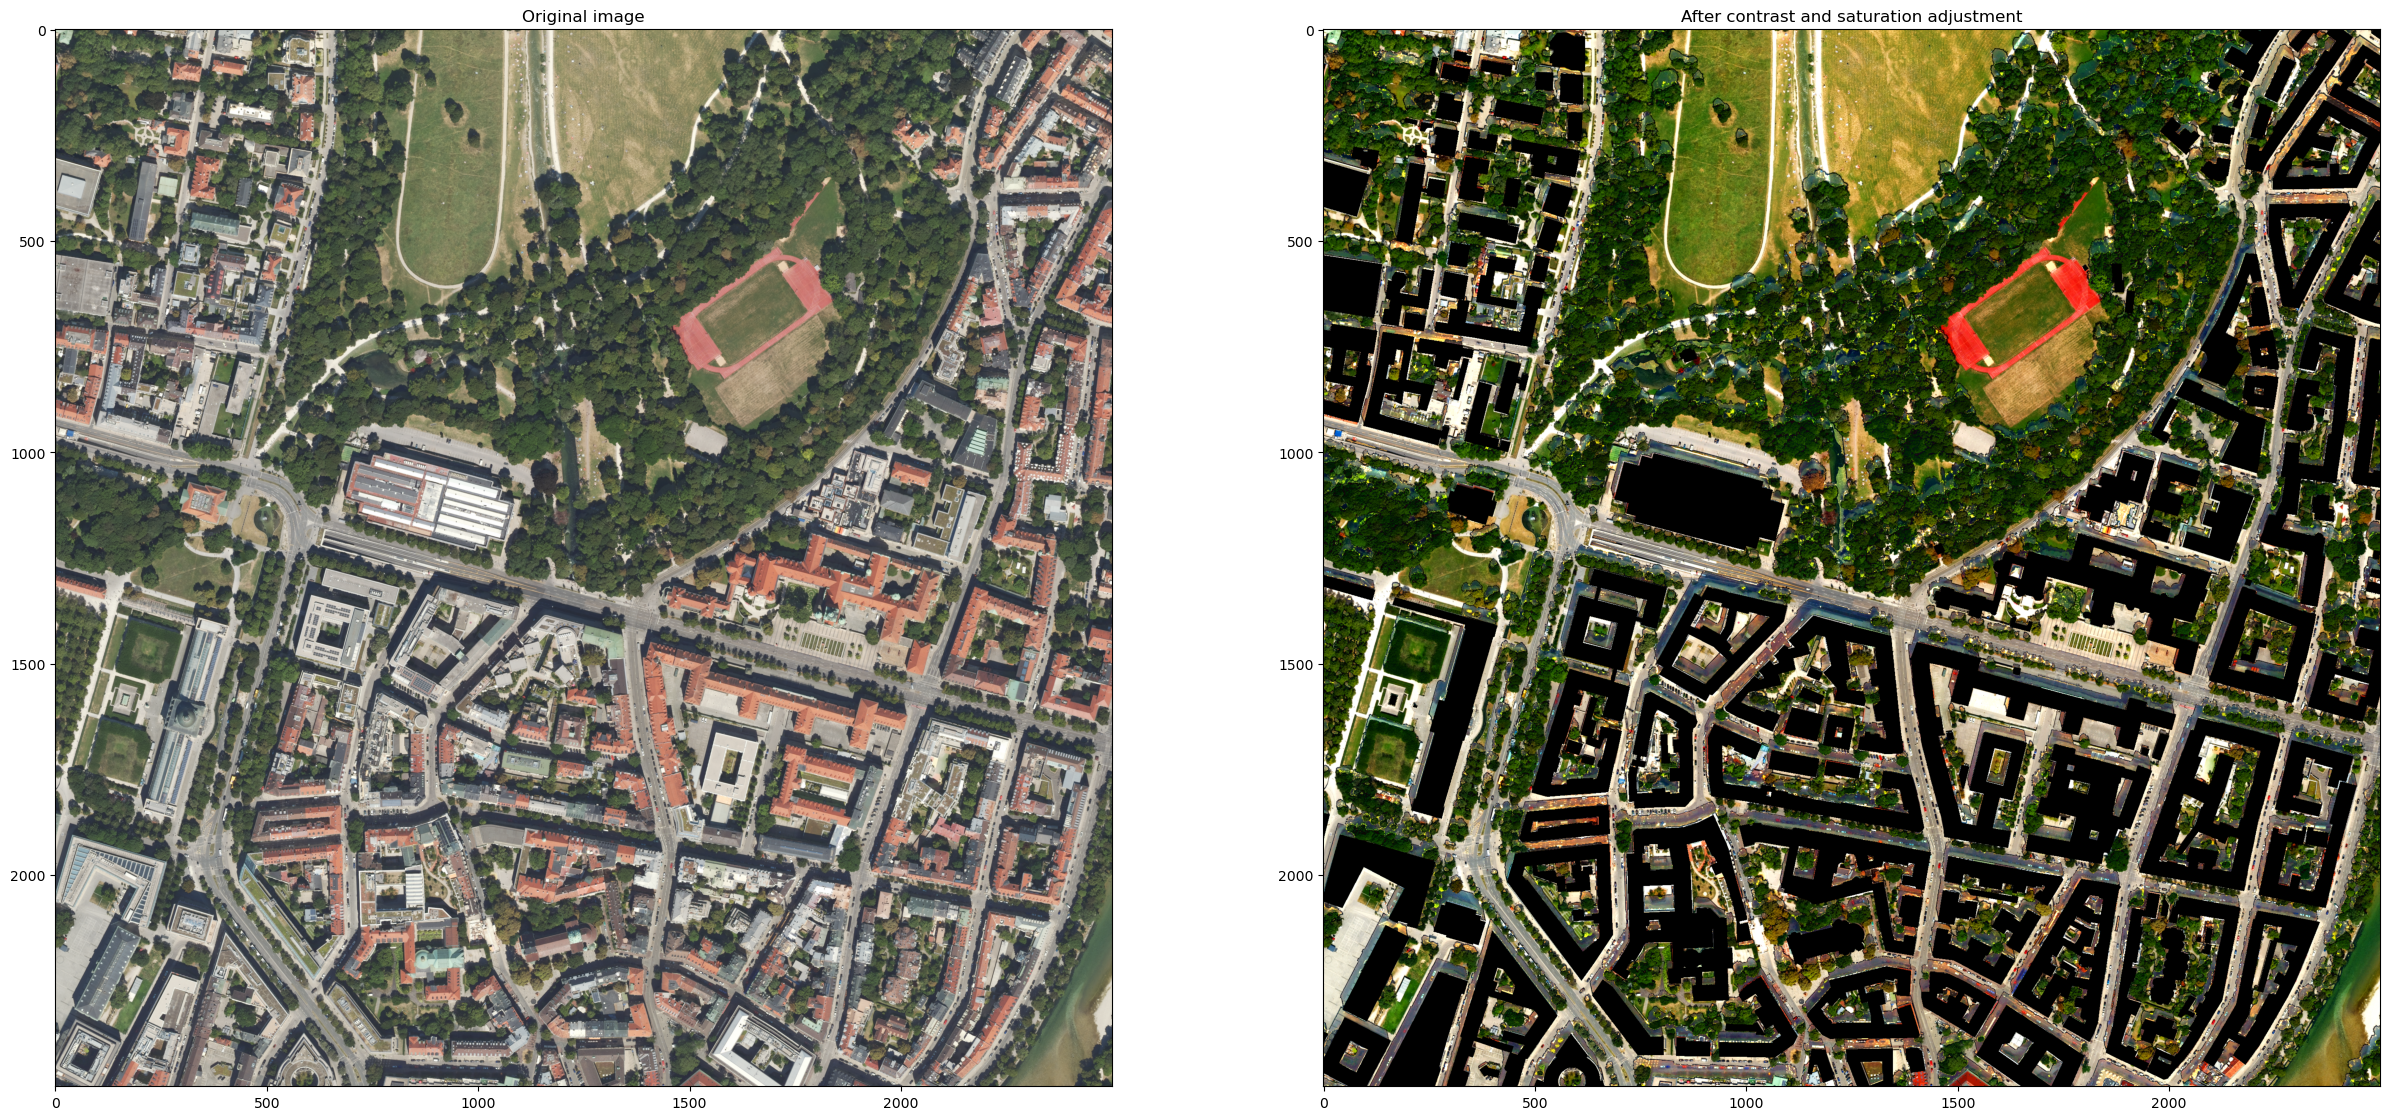

In [15]:
img_modified = "tmp/image_preprocessed.tif"
os.system(f'cp "{image}" "{img_modified}"')

# Preprocessing Pipeline
remove_shadows(img_modified, output=img_modified)
# gaussian_blur(img_modified, output=img_modified)
increase_contrast(img_modified, output=img_modified, alpha=1.5, beta=-50)
increase_saturation(img_modified, output=img_modified, factor=1.5)

cut_houses(img_modified, output=img_modified)


# Load image
img_org = cv2.imread(image)
img_org = cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)
img_edit = cv2.imread(img_modified)
img_edit = cv2.cvtColor(img_edit, cv2.COLOR_BGR2RGB)
# plot image
plt.figure(figsize=(30, 30))
plt.subplot(1, 2, 1)
plt.imshow(img_org)
plt.title('Original image')
plt.subplot(1, 2, 2)
plt.imshow(img_edit)
plt.title('After contrast and saturation adjustment')
plt.show()

In [6]:
%env CUDA_VISIBLE_DEVICES="" # to run on CPU

env: CUDA_VISIBLE_DEVICES="" # to run on CPU


In [17]:
SAM_CHECKPOINT = "../segment-anything/checkpoints/sam_vit_h_4b8939.pth"
MODEL_TYPE = "vit_h"
sam = LangSAM(model_type=MODEL_TYPE, checkpoint=SAM_CHECKPOINT)

final text_encoder_type: bert-base-uncased


In [26]:
box_threshold = 0.3
text_threshold = 0.5
text_prompt = "tree . lawn . gras"
mask_path = f'tmp/image_mask.tif'

sam.predict(img_modified, text_prompt, 
            box_threshold=box_threshold, 
            text_threshold=text_threshold, 
            output=mask_path
            )

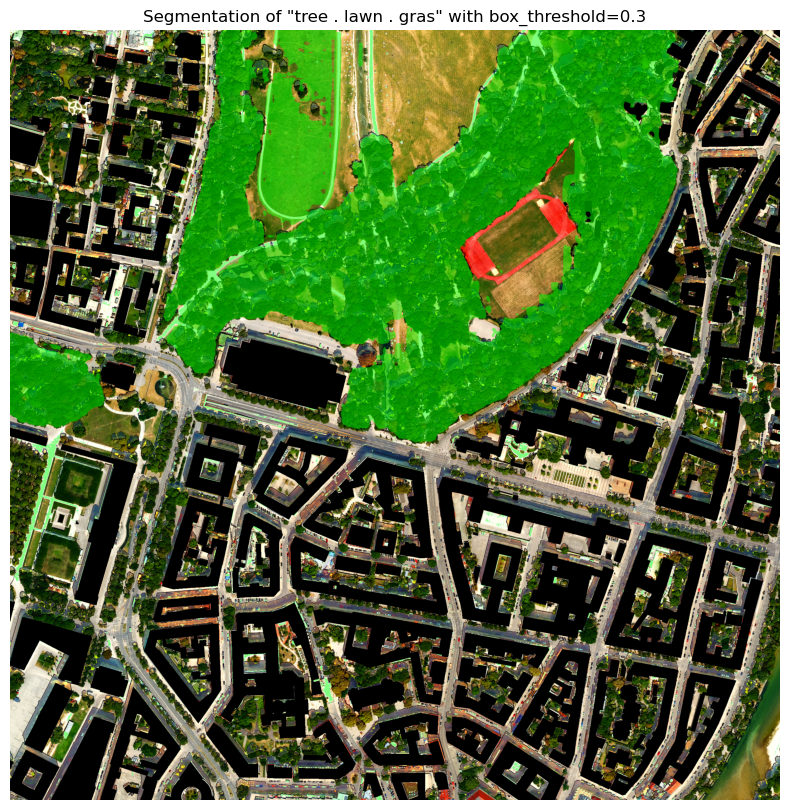

In [28]:
output_path = f'tmp/image_overlay_{box_threshold}_{text_threshold}.png'
title = f'Segmentation of "{text_prompt}" with box_threshold={box_threshold}'
plot_overlay(img_modified, mask_path,  output=output_path, title=title)